In [55]:
import numpy as np
import os
import rasterio
from math import log10, sqrt



In [56]:
df_hr = "/home/ubuntu/PyTorch-GAN/data2/test/hr"
df_gen = "/home/ubuntu/PyTorch-GAN/data2/test/result/approach9" # Revise the generated test data here
df_mask = "/home/ubuntu/PyTorch-GAN/data2/test/mask_hr"

max_pixel = 6787

gen_path = os.listdir(df_gen)
gen_path.sort()
gen = []
for file_ in gen_path:
    f_name = os.path.join(df_gen,str(file_))
    gen.append(f_name)

hr_path = os.listdir(df_hr)
hr_path.sort()
hr = []
for file_ in hr_path:
    f_name = os.path.join(df_hr,str(file_))
    hr.append(f_name)

mask_path = os.listdir(df_mask)
mask_path.sort()
mask = []
for file_ in mask_path:
    f_name = os.path.join(df_mask,str(file_))
    mask.append(f_name)

def get_data(hr,gen,mask):
    img_hr = rasterio.open(hr)
    img_gen = rasterio.open(gen)
    img_mask = rasterio.open(mask)
    
    img_hr = img_hr.read(1)
    img_gen = img_gen.read(1)
    img_mask = img_mask.read(1)

    mask1 = np.where(img_mask == 1, 1, 0)
    mask2 = np.where(img_mask == 0, 1, 0)
    img_mask = mask1 + mask2

    img_hr = img_hr*img_mask
    img_gen = img_gen*img_mask

    return(img_hr,img_gen,img_mask)



In [57]:
exp = "approach9"

In [58]:
from skimage.metrics import structural_similarity as ssim

SSIM = []
MSE = []
psnr = []
count = []
saved_name = []
for i in range (400):  
    # Read data in the list
    img_hr, img_gen, img_mask = get_data(hr[i],gen[i],mask[i])
    # Create the mask of coastal area

    pixel_count = np.sum(img_mask)

    if pixel_count != 0:
        saved_name.append(hr[i])

        # Calculate MSE, SSIM and PSNR
        mse_gen = np.sum((img_hr - img_gen) ** 2) / pixel_count
        ssim_gen = ssim(img_hr, img_gen, data_range = 6787+10802)
        psnr_gen = 20 * log10(max_pixel / sqrt(mse_gen))
        
        SSIM.append(ssim_gen)
        MSE.append(mse_gen)
        psnr.append(psnr_gen)
        # Calculate percentage of sign changes on coastal area
        sign_hr = img_hr/np.abs(img_hr)
        sign_gen = img_gen/np.abs(img_gen)
        sign = sign_hr*sign_gen
        change = np.where(sign==-1, 1, 0)
        count_num = np.sum(change)
        count.append(count_num/pixel_count)
        
# Print all evaluation metrics   
print(np.mean(SSIM),np.max(SSIM),np.min(SSIM))
print(np.mean(MSE),np.max(MSE),np.min(MSE))
print(np.mean(psnr),np.max(psnr),np.min(psnr))    
print(np.mean(count),np.max(count),np.min(count))

/home/ubuntu/anaconda3/envs/srgan/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/anaconda3/envs/srgan/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


0.6466863157074818 0.997347458259473 -0.25040429752384774
2141897.185954557 25826206.42754119 1081.9327517597526
24.147994796355952 46.291554306320535 2.512950803854217
0.3363495581569833 0.9184905093404117 0.0


In [59]:
x = np.array(SSIM).shape
x = x[0]

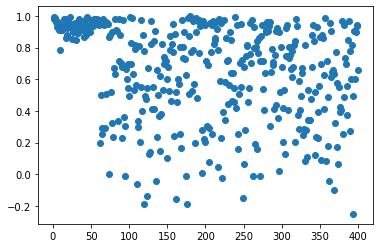

In [60]:
import matplotlib.pyplot as plt
X = np.linspace(1,x,num=x)
plt.scatter(X, SSIM)
plt.savefig('/home/ubuntu/PyTorch-GAN/data2/test/result/{}_ocean_SSIM.png'.format(exp)) 


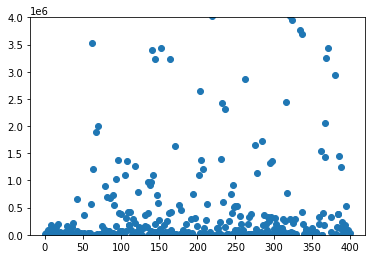

In [61]:
plt.scatter(X, MSE)
plt.ylim(0,4000000)
plt.savefig('/home/ubuntu/PyTorch-GAN/data2/test/result/{}_ocean_MSE.png'.format(exp)) 


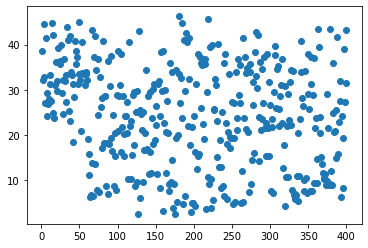

In [62]:
np.shape(psnr)
plt.scatter(X, psnr)
plt.savefig('/home/ubuntu/PyTorch-GAN/data2/test/result/{}_ocean_PSNR.png'.format(exp)) 

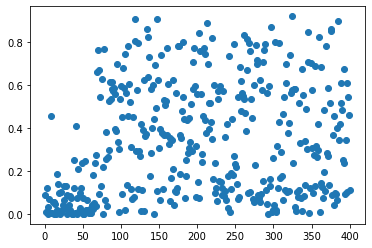

In [63]:
plt.scatter(X, count)
plt.savefig('/home/ubuntu/PyTorch-GAN/data2/test/result/{}_ocean_sign.png'.format(exp)) 